# Lab 4 - Hypothesis testing and statistical analysis

## Get the data (1 mark)

In [3]:
import pandas as pd
import numpy as np

The data is called `census11sample.csv`. It is on Blackboard. Read it in to a dataframe.

This data consists of samples of ages from the 2011 census in England for different regions. Each data point is the age at the last birthday of an individual. So, a zero is a person who has not reached their first birthday, a 35 is a person who is 35 years old, and so on. The exception is that the age 100 really means between 100 and 114. Apparently, the Office for National Statistics filtered out everyone over 114. There is a sample of 1000 individual ages for each of nine regions. The data is *derived from* the Office for National Statistics: 2011 Census aggregate data. UK Data Service (Edition: February 2017). DOI: http://dx.doi.org/10.5257/census/aggregate-2011-2, but was taken from the InFuse website, http://infuse2011.ukdataservice.ac.uk. You will not find the data we are using there, however. These samples were created from this data by Jonathan Shapiro.

In [4]:
data = pd.read_csv("census11sample.csv")
data.head()

,Unnamed: 0,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,0,27,32,65,60,44,79,43,8,9
1,1,10,36,40,19,52,46,58,87,40
2,2,82,53,60,34,2,29,18,46,57
3,3,33,63,25,60,9,26,30,52,74
4,4,55,98,4,47,58,37,18,67,19


### Printing the DataFrame


Since we have a extra column in the DataFrame( the first column). As you can see the first column is exactly the same as the count on the side of how many rows me have. So now I extract that particular column and rename the new DataFrame.

In [5]:
new_data=data.drop(columns=["Unnamed: 0"])

In [6]:
new_data

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
...,...,...,...,...,...,...,...,...,...
995,42,59,47,37,61,67,29,16,21
996,49,45,16,80,87,86,4,79,74
997,31,5,25,39,52,22,17,8,34
998,38,69,52,4,3,76,24,51,94


In [7]:
new_data.shape

(1000, 9)

In [8]:
new_data.ndim

2

### Statistics of the DataFrame 

The function describe() is displaying the summary statistics for the columns in another DataFrame.

In [9]:
new_data.describe()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.00000
mean,40.171000,39.079000,38.922000,39.178000,40.181000,41.417000,35.91900,40.01800,43.33600
std,23.229407,23.303085,23.016552,23.468299,23.540016,23.530338,22.18546,23.14012,24.40042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
25%,21.000000,19.000000,20.000000,19.000000,20.000000,22.000000,19.00000,20.00000,22.00000
50%,40.000000,39.500000,38.500000,38.000000,40.000000,41.000000,34.00000,40.00000,44.00000
75%,58.000000,57.000000,56.250000,58.000000,58.000000,60.000000,51.00000,58.00000,61.25000
max,94.000000,99.000000,100.000000,95.000000,96.000000,97.000000,96.00000,95.00000,98.00000


## Divide the data (2 marks)

You are going to explore this data and from your explorations devise a hypothesis to test. Once you generate a hypothesis, you need a fresh set of data on which to test it. If you use the same data, it is biased in favor of your hypothesis. So, split the data in to two parts, a set for exploration and hythesis generation, and a set on which to test the hypothesis. In what follows, I will call the two sets: sample_explore and sample_test. (You can call them whatever you want.)

# Splitting the data into two parts
I am dividing the data in two parts: test and hypothesis.
I decided to split the data into 40% using for testing the data, and the remaining 60% for exploring. 
With this method  I am splitting the data randomly and it doesn't change when the code is ran repeatedly (but I still save it in a csv file).


In [10]:
new_data_copy = new_data.copy()
test_data = new_data_copy.sample(frac=0.40,random_state=0)
explore_data = new_data_copy.drop(test_data.index)

In [11]:
explore_data=explore_data.reset_index()

When the 'explore_data' code is run the first column in the DataFrame is displayed the index, so we will drop that column.
This will also be done for the test_data.


In [12]:
explore_data = explore_data.drop(columns=["index"])
test_data = test_data.reset_index()
test_data = test_data.drop(columns=["index"])

Saving the tests into CSV files for further manipulation.

In [13]:
# explore_data.to_csv("explore.csv")
# test_data.to_csv("test.csv")

## Explore DataFrame
The explore_data DataFrame can be seen here, with the reset index.

In [14]:
explore_data = pd.read_csv("explore.csv", index_col = 0)
explore_data

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,33,63,25,60,9,26,30,52,74
2,55,98,4,47,58,37,18,67,19
3,42,44,49,59,40,65,13,8,52
4,62,44,41,76,8,74,54,40,72
...,...,...,...,...,...,...,...,...,...
595,75,12,11,28,57,31,19,53,36
596,24,11,59,15,2,33,81,89,13
597,14,45,13,37,8,62,54,65,7
598,42,59,47,37,61,67,29,16,21


## Testing DataFrame
The test_data DataFrame can be seen here, with the reset index.

In [15]:
test_data = pd.read_csv("test.csv", index_col = 0)
test_data

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,37,59,29,83,40,7,5,65,95
1,6,24,82,55,31,66,2,27,21
2,54,88,44,54,63,33,47,52,45
3,49,42,43,41,13,16,90,79,77
4,73,20,50,9,63,11,28,27,86
...,...,...,...,...,...,...,...,...,...
395,43,50,32,13,16,37,36,30,54
396,40,46,50,32,59,10,13,38,44
397,8,50,24,26,71,28,28,76,28
398,12,59,52,0,1,76,26,32,86


## Explore the data (5 marks)

First, we get the basic statistics about the explore data. 

In [16]:
explore_stat = explore_data.describe()
explore_stat

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,39.761667,39.595000,39.088333,38.573333,39.793333,40.920000,35.963333,38.753333,42.581667
std,23.695090,23.254367,23.514579,23.254158,23.419965,23.609729,21.439093,23.303309,24.312723
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,19.000000,19.000000,18.000000,20.000000,21.000000,19.000000,19.000000,21.000000
50%,39.000000,41.000000,39.000000,37.000000,40.000000,41.000000,34.000000,39.000000,43.000000
75%,58.000000,57.000000,58.250000,58.000000,58.000000,60.000000,51.000000,57.000000,61.000000
max,94.000000,98.000000,94.000000,90.000000,96.000000,97.000000,96.000000,95.000000,98.000000


# Splitting between generations

1. Generation Z (0-25)
2. Generation Y (26 - 40)
3. Above 40 and on.

## Generation Z

Splitting the data between generation Z which is people between 0-25 years old.

Setting the table to display all people from the Generation Z in the original table, while the people which are above 25 are marked as 'NaN'.
Then we get the statistics for each region about this particular generation.

In [17]:
genz = explore_data[explore_data < 26]
genz

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,9.0
1,NaN,NaN,25.0,NaN,9.0,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,18.0,NaN,19.0
3,NaN,NaN,NaN,NaN,NaN,NaN,13.0,8.0,NaN
4,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
595,NaN,12.0,11.0,NaN,NaN,NaN,19.0,NaN,NaN
596,24.0,11.0,NaN,15.0,2.0,NaN,NaN,NaN,13.0
597,14.0,NaN,13.0,NaN,8.0,NaN,NaN,NaN,7.0
598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,21.0


In [18]:
genz.describe()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,195.000000,191.000000,207.000000,206.000000,187.000000,177.000000,204.000000,196.000000,178.000000
mean,13.215385,12.198953,12.990338,13.106796,12.406417,12.954802,13.029412,12.224490,13.252809
std,8.074062,7.233853,7.548542,7.012063,7.321023,7.467216,7.834439,7.084878,7.312872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,7.000000,8.000000,5.500000,6.000000,6.000000,7.000000,7.000000
50%,14.000000,12.000000,13.000000,14.000000,13.000000,14.000000,13.000000,12.000000,14.500000
75%,20.000000,18.000000,20.000000,18.750000,18.000000,19.000000,20.000000,19.000000,19.000000
max,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000


We can easily see that North West region has the lowest mean.
And the biggest mean has the South West region. 

## Getting the number of people within the range of 0-25 (Generation Z) in each region

In [19]:
genz = genz.count().to_frame()
genz = genz.reset_index()
genz = genz.rename(columns = {"index": "Region", 0:"NO.Z"})
genz

,Region,NO.Z
0,North East,195
1,North West,191
2,Yorkshire and The Humber,207
3,East Midlands,206
4,West Midlands,187
5,East of England,177
6,London,204
7,South East,196
8,South West,178


### Bar Plot for Gen Z

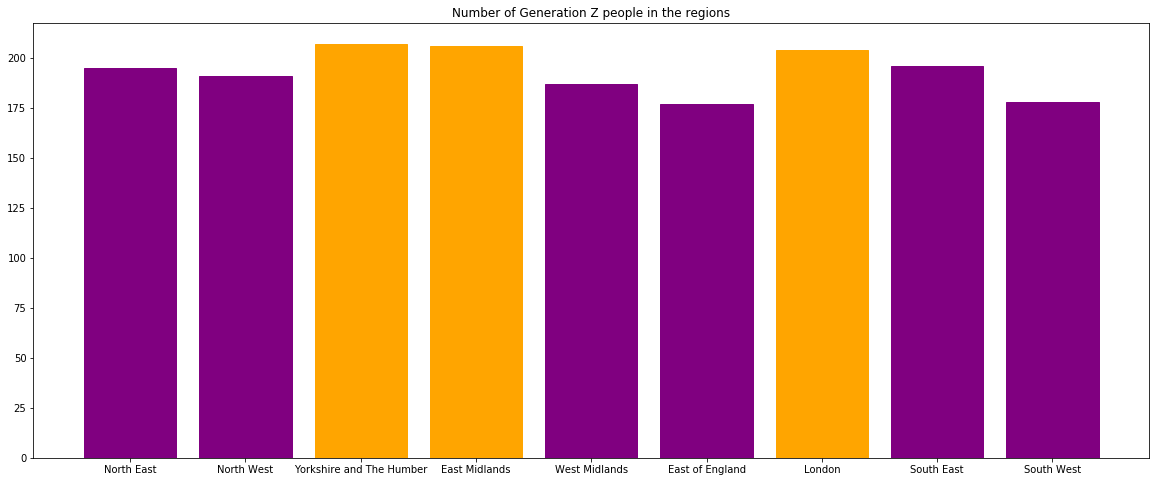

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,8))
genz.set_index("Region", inplace=True)
genz.head()

bars = plt.bar(genz.index, genz['NO.Z'])
plt.title("Number of Generation Z people in the regions")
colours = ['purple', 'purple', 'orange', 'orange', 'purple', 'purple', 'orange', 'purple', 'purple']

for i in range(9):
    bars[i].set_color(colours[i])
plt.show()

As we can see, there are more people of the Z generation in the following regions:
1. Yorkshire and The Humber (207)
2. East Midlands (206)
3. London (205)

## Generation Y

DataFrame for people between 26-40 in all regions:

In [21]:
geny = explore_data[(26 <= explore_data) & (explore_data <= 40)]
geny

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33.0,NaN,NaN,NaN,NaN,26.0,30.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN
...,...,...,...,...,...,...,...,...,...
595,NaN,NaN,NaN,28.0,NaN,31.0,NaN,NaN,36.0
596,NaN,NaN,NaN,NaN,NaN,33.0,NaN,NaN,NaN
597,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN
598,NaN,NaN,NaN,37.0,NaN,NaN,29.0,NaN,NaN


In [22]:
geny.describe()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,113.000000,107.000000,106.000000,119.000000,120.000000,122.000000,155.000000,123.000000,104.000000
mean,32.008850,33.635514,33.349057,32.848739,32.550000,33.221311,32.703226,33.097561,33.682692
std,4.281387,4.274524,4.544054,4.490364,4.483115,4.398558,4.226039,4.437941,4.987877
min,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
25%,28.000000,30.000000,29.250000,29.000000,29.000000,30.000000,29.000000,29.000000,28.000000
50%,32.000000,34.000000,33.500000,33.000000,32.000000,33.000000,32.000000,33.000000,35.000000
75%,35.000000,37.000000,37.000000,37.000000,36.000000,37.000000,36.500000,37.000000,38.250000
max,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000


## Number of people from Generation Y

In [23]:
geny = geny.count().to_frame()
geny = geny.reset_index()
geny = geny.rename(columns = {"index": "Region", 0:"NO.Y"})
geny

,Region,NO.Y
0,North East,113
1,North West,107
2,Yorkshire and The Humber,106
3,East Midlands,119
4,West Midlands,120
5,East of England,122
6,London,155
7,South East,123
8,South West,104


### Bar Plot for Gen Y

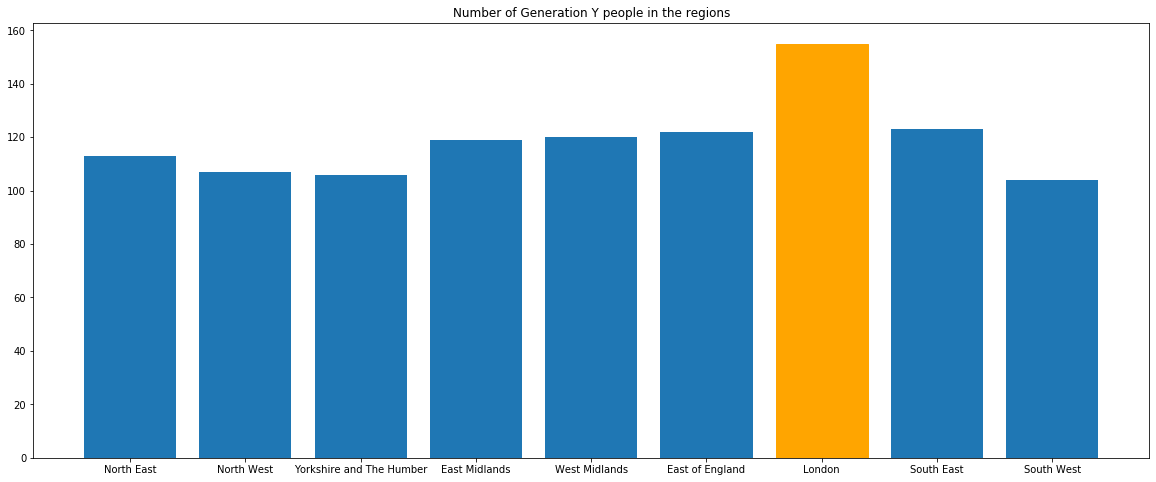

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,8))
geny.set_index("Region", inplace=True)
geny.head()

bars = plt.bar(geny.index, geny['NO.Y'])
plt.title("Number of Generation Y people in the regions")
colours = ['orange']
bars[6].set_color(colours[0])
plt.show()

As you can see the highest number of people from generation Y is in London.

## Above 40 

 DataFrame for people above 40 in all regions:

In [25]:
above_40 = explore_data[explore_data > 40]
above_40

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,NaN,NaN,65.0,60.0,44.0,79.0,43.0,NaN,NaN
1,NaN,63.0,NaN,60.0,NaN,NaN,NaN,52.0,74.0
2,55.0,98.0,NaN,47.0,58.0,NaN,NaN,67.0,NaN
3,42.0,44.0,49.0,59.0,NaN,65.0,NaN,NaN,52.0
4,62.0,44.0,41.0,76.0,NaN,74.0,54.0,NaN,72.0
...,...,...,...,...,...,...,...,...,...
595,75.0,NaN,NaN,NaN,57.0,NaN,NaN,53.0,NaN
596,NaN,NaN,59.0,NaN,NaN,NaN,81.0,89.0,NaN
597,NaN,45.0,NaN,NaN,NaN,62.0,54.0,65.0,NaN
598,42.0,59.0,47.0,NaN,61.0,67.0,NaN,NaN,NaN


In [26]:
above_40.describe()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,292.000000,302.000000,287.000000,275.000000,293.000000,301.000000,241.000000,281.000000,318.000000
mean,60.489726,59.033113,60.031359,60.127273,60.238908,60.485050,57.473029,59.733096,61.908805
std,13.360578,12.988325,12.811260,12.984627,12.707629,14.243733,12.855620,13.029497,13.975232
min,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
25%,49.000000,48.000000,49.000000,49.000000,50.000000,48.000000,47.000000,48.000000,49.000000
50%,58.000000,57.000000,59.000000,59.000000,58.000000,60.000000,55.000000,59.000000,60.000000
75%,72.000000,68.000000,68.000000,70.000000,68.000000,70.000000,66.000000,70.000000,73.000000
max,94.000000,98.000000,94.000000,90.000000,96.000000,97.000000,96.000000,95.000000,98.000000


## Number of people above 40 years in all regions:

In [27]:
above_40 = above_40.count().to_frame()
above_40 = above_40.reset_index()
above_40 = above_40.rename(columns = {"index": "Region", 0:"Above 40"})
above_40

,Region,Above 40
0,North East,292
1,North West,302
2,Yorkshire and The Humber,287
3,East Midlands,275
4,West Midlands,293
5,East of England,301
6,London,241
7,South East,281
8,South West,318


### Bar plot for people above 40 years

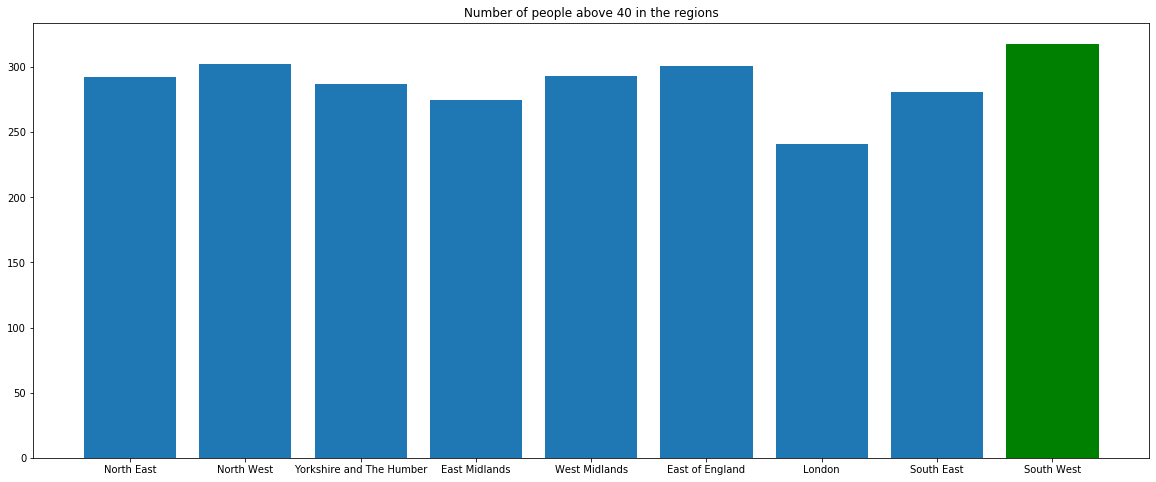

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,8))
above_40.set_index("Region", inplace=True)
above_40.head()

bars = plt.bar(above_40.index, above_40['Above 40'])
plt.title("Number of people above 40 in the regions")
colours = ['green']
bars[8].set_color(colours[0])
plt.show()

We can see that the number of people above 40 years in the South West of UK is the highest with 318 people.

## Number of people in all regions and the 3 categories

In [29]:
together = pd.concat([genz, geny, above_40], axis=1)
names = ["Gen Z", "Gen Y", "Above 40"]
together.columns = names
together

,Gen Z,Gen Y,Above 40
Region,,,
North East,195,113,292
North West,191,107,302
Yorkshire and The Humber,207,106,287
East Midlands,206,119,275
West Midlands,187,120,293
East of England,177,122,301
London,204,155,241
South East,196,123,281
South West,178,104,318


## State your hypothesis, and state the evidence that justifies it. (2 marks)

## Null Hypothesis:
### - The region Yorkshire and The Humber and the region East Midlands have a significant similar number of people from Generation Z (0-25). 

## Alternate Hypothesis:
### - Both regions are different in the number of people from Gen Z.

## Plan the test. (3 marks)

State how you plan to test the hypothesis briefly. State the null hypothesis and the probability level at which you will role it out (95%, 99%, etc.).

I will be using the Simulation Method to test my hypothesis. 
1. $\alpha$ = 0.05

First i take the alpha value to be $\alpha$ = 0.05 , and further on i calculate the p value in order to compare the two values. 
If :
$p \leq \alpha$,

    - the null hypothesis is rejected. Differences a statistically significant at level $\alpha$.
    
    - Otherwise, the null hypothesis cannot be rejected at this level.  
    
First we get some random data for both regions from the testing data/Pool the data.
We combine it into two data sets, simulate the 2 datasets, both of size: 400. After that we calculating the Success probability of the combined data ( both manually bellow and coded). Using this information we compare the mean to the test probability and then I save it into an array of p-values of the region East Mindlands, since we are comapring it to the Yorkshire and The Humber region. 
How often do they generate a difference of 1 (207-206=1 => similar to eachother)?

---

## Perform the statistical test of the hypothesis. (5 marks)

In [30]:
yh_no = test_data['Yorkshire and The Humber'][test_data['Yorkshire and The Humber'] < 26].count()
yh_no

126

In [31]:
em_no = test_data['East Midlands'][test_data['East Midlands'] <26].count()
em_no

125

### Recover probability 
pool_prob = (yh_precent + em_precent)/2
so for the yh_precent we get 126/400 = 0.315
for the em_precent we get 125/400 = 0.3125
so finally for the pool_prob we get (0.315 + 0.3125)/2=0.31375‬
Or if we coded...

In [38]:
from scipy.stats import bernoulli

yh_no = test_data['Yorkshire and The Humber'][test_data['Yorkshire and The Humber'] < 26].count()
yh_percent = yh_no/400
p_value = {}
count = 0
NTrials = 10000
dataset1 = 400
dataset2 = 400

em_no = test_data['East Midlands'][test_data['East Midlands'] <26].count()
test = abs(yh_no - em_no)
ts = test/dataset1
em_percent = em_no/dataset2
pool_prob = (yh_percent + em_percent) /2

for trial in range(NTrials):
    pool_result = bernoulli.rvs(pool_prob, size=dataset1)
    m1 = pool_result.mean()
    pool_result2 = bernoulli.rvs(pool_prob, size= dataset2)
    m2 = pool_result2.mean()
    m = abs(m1 - m2)
    if m >= ts:
        count += 1
p_value['East Midlands'] = count/NTrials
print(p_value)

{'East Midlands': 0.9691}


#### As we can see we get a number for the East Midlands bigger than  $\alpha$ = 0.05 

In [33]:
em_test = {'East Midlands': 0.9681}

for region, a in em_test.items():
    if(a >= 0.05):
        print(region + ' has a simlar number of people from gen Z with the region Yorkshire and The Humber')
    else:
        print('fail')

East Midlands has a simlar number of people from gen Z with the region Yorkshire and The Humber



In the code above we can see that by coding the result and comparing it to the alpha- values we get the printed out statement.

---

## Conclusions. (2 Marks) 

Using the Simulation method, i found that the null hypothesis i predicted cannot be ruled out(by a p value of 0.9681).

In this case the Alternative hypothesis fails and we get that in fact:
### Both regions, East Midlands and Yorkshire and The Humber have a significant close similarity in the number of people from the Generation Z in the UK.